# Chapter 8
# Tree- Based Methods

Tree based methods involves stratifying or segmenting the predictor space into a no. of simple regions. To make a prediction, means or mode of training observations is used in the region it belongs.

Since the splitting rules can be summarized in a tree, these approches are called __decision tree methods.__

## Regression Trees
It consists of a series of splitting rules starting at the top of tree. For 2 variable $X_1$ and $X_2$(continous).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [16]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)
Hitters = Hitters[Hitters["Salary"].isna() == False]
Hitters.shape

(263, 20)

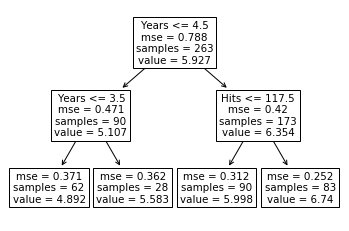

In [47]:
X = np.array(Hitters[["Years","Hits"]])
y = np.array(np.log(Hitters.Salary)).reshape(-1,1)
DT_model = DecisionTreeRegressor(random_state = 0, max_depth = 2, min_samples_leaf = 5).fit(X,y)
plot_tree(DT_model, feature_names = ["Years","Hits"])
plt.show()

Here, the tree has created 4 different segments.

$R_1$ = {X | Years <= 3.5}

$R_2$ = {X | Years > 3.5 and Years <= 4.5}

$R_3$ = {X | Years > 4.5 and Hits <= 117.5}

$R_4$ = {X | Years > 4.5 and Hits > 117.5}

* These 4 regions are called the _terminal nodes_ or leaves of the tree.
* The point along the tree where the predictor space is split are called the _internal node_.
* Segments of the trees connecting the nodes are called _branches_.

The variable that is used for the split first is the most important variable and the importance decrease as we go down the tree.

Regression trees are the over- simplification of true relationship between X and y but they are easier to interpret and provides a nice graphical representation.

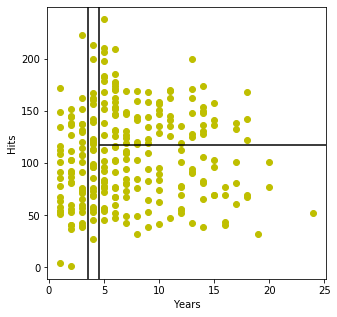

In [91]:
plt.figure(figsize = (5,5))
plt.scatter(Hitters.Years, Hitters.Hits, color = "y")
plt.axvline(x = 3.5, color = "black"); plt.axvline(x = 4.5, color = "black")
plt.axhline(y = 117.5, xmin = 0.19,color = "black")
plt.xlabel("Years"); plt.ylabel("Hits")
plt.show()

The above chart shows the 4 different region created by the decision tree above.

__Prediction and Stratification of feature space__
1. Divide the predictor space - i.e. the set of possible values for $X_1$, $X_2$ ,...., $X_p$ into J distinct and non-overlapping regions $R_1$, $R_2$,...,$R_J$.
2. For every observation that fall into regions $R_j$, we make same prediction (mean of the response value).

How to select the regions in step 1?

In theory, the regions could have any shape. However, we choose to divide into high dimensional rectangles. Goal is to find these boxes $R_1$, $R_2$,...,$R_J$ that minimizes the RSS given by 
$$\sum_{j = 1}^{J}\sum_{i\epsilon R_j}(y_i - \hat y_{R_j})^2$$
where $\hat y_{R_j}$ = mean response for training observations within $j^{th}$ box.

Considering all possible boxes is infeasible. We use greedy approach called __recursive binary splitting.__

It is greedy because at each step of tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some futher step.